# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Behavior Cloning

---
## Show sample images

Image shape: (160, 320, 3)
Steer Angle: 0.000


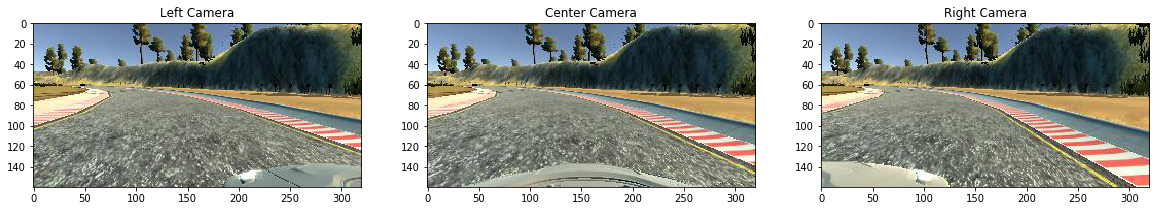

In [9]:
import csv
import cv2
import numpy as np

# Visualizations will be shown in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt


track1_csv_file = './data/track1/driving_log.csv'
reversed_track1_csv_file = './data/track1_reversed/driving_log.csv'
udacity_csv_file = './data/udacity/driving_log.csv'

with open(track1_csv_file) as csvfile:
    reader = csv.reader(csvfile)
    line = next(reader)
    # convert BRG to RGB from cv2.imread
    c_image = cv2.cvtColor(cv2.imread(line[0]), cv2.COLOR_BGR2RGB)
    l_image = cv2.cvtColor(cv2.imread(line[1]), cv2.COLOR_BGR2RGB)
    r_image = cv2.cvtColor(cv2.imread(line[2]), cv2.COLOR_BGR2RGB)
    
    fig = plt.figure(figsize=(20,10))
    fig.add_subplot(1, 3, 1)
    plt.title('Left Camera')
    plt.imshow(l_image)
    fig.add_subplot(1, 3, 2)
    plt.title('Center Camera')
    plt.imshow(c_image)
    fig.add_subplot(1, 3, 3)
    plt.title('Right Camera')
    plt.imshow(r_image)
    
    print('Image shape: {}'.format(c_image.shape))
    print('Steer Angle: {:.3f}'.format(float(line[3])))

---
## Show Steering Angle Distribuition

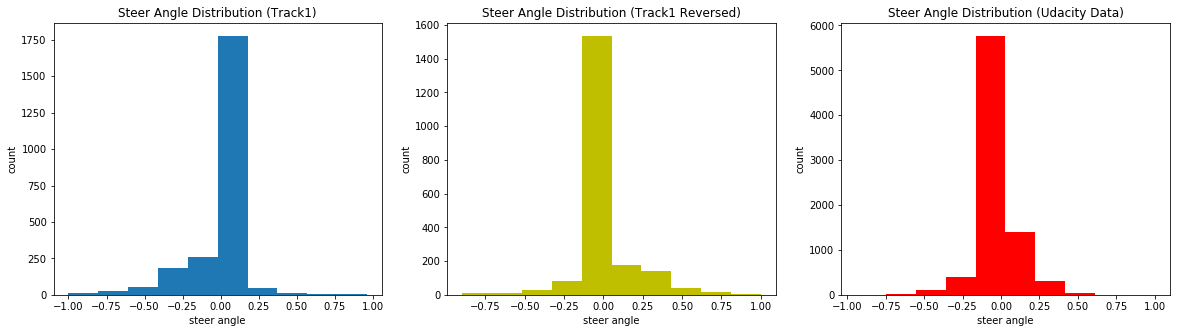

In [16]:
def read_steer_angles(steer_angles, track_csv_file):
    with open(track_csv_file) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            try:
                steer_angle = float(line[3])
                steer_angles.append(steer_angle)
            except :
                continue

steer_angles = []
read_steer_angles(steer_angles, track1_csv_file)

steer_angles_reversed = []
read_steer_angles(steer_angles_reversed, reversed_track1_csv_file)

steer_angles_udacity = []
read_steer_angles(steer_angles_udacity, udacity_csv_file)

fig = plt.figure(figsize=(20,5))
fig.add_subplot(1, 3, 1)
plt.hist(steer_angles)
plt.title('Steer Angle Distribution (Track1)')
plt.xlabel('steer angle')
plt.ylabel('count')

fig.add_subplot(1, 3, 2)
plt.hist(steer_angles_reversed, color='y')
plt.title('Steer Angle Distribution (Track1 Reversed)')
plt.xlabel('steer angle')
plt.ylabel('count')

fig.add_subplot(1, 3, 3)
plt.hist(steer_angles_udacity, color='r')
plt.title('Steer Angle Distribution (Udacity Data)')
plt.xlabel('steer angle')
plt.ylabel('count')

pass



---
## Crop Images

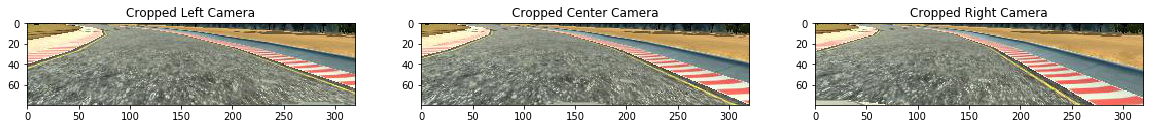

In [15]:
l_image_cropped = l_image[60:140,:]
c_image_cropped = c_image[60:140,:]
r_image_cropped = r_image[60:140,:]

fig = plt.figure(figsize=(20,10))
fig.add_subplot(1, 3, 1)
plt.title('Cropped Left Camera')
plt.imshow(l_image_cropped)
fig.add_subplot(1, 3, 2)
plt.title('Cropped Center Camera')
plt.imshow(c_image_cropped)
fig.add_subplot(1, 3, 3)
plt.title('Cropped Right Camera')
plt.imshow(r_image_cropped)

---
## Training and Validation loss

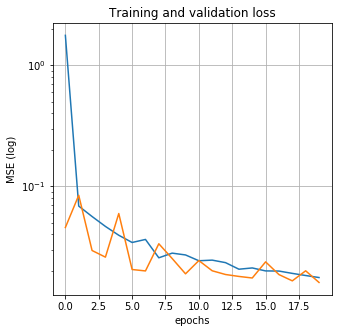

In [25]:
training_loss = [1.7705754838626087, 0.068623588070296643, 0.056249957041225866, 0.046579233789370247, 0.039367855835356465, 0.034309698174746404, 0.036352390136568907, 0.025630820558763624, 0.028007491228756221, 0.027062979836082482, 0.024227383008742748, 0.024516392530965159, 0.023368597779828155, 0.020625863800039928, 0.021129121304642645, 0.019965913741601744, 0.01991250851025117, 0.019048816372304392, 0.018292552737777766, 0.017599723612804964]
val_loss = [0.045636752045940802, 0.084266155028513201, 0.029451899569142948, 0.025958255823177026, 0.059534481947381653, 0.020508314335947846, 0.019957423425958545, 0.033479793551718276, 0.025289914515965125, 0.018891935887515757, 0.024309997564702961, 0.02001494594638812, 0.018643995243956379, 0.017976795553948578, 0.017446710364544454, 0.023720952310332107, 0.01861858709404866, 0.016525755398998074, 0.020006075508082401, 0.016030377666872667]

fig = plt.figure(figsize=(5,5))
plt.title('Training and validation loss')
plt.plot(training_loss, label='train')
plt.plot(val_loss, label='validation')
plt.xlabel('epochs')
plt.ylabel('MSE (log)')
plt.yscale('log')
plt.grid(True)

